In [1]:
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from functools import reduce

%matplotlib inline

In [2]:
truck = pd.read_csv('../data/average_truck_speeds_on_us_highways_2009.csv', skiprows=2)
#source: US Dept. of Transportation - https://ops.fhwa.dot.gov/freight/freight_analysis/nat_freight_stats/docs/10factsfigures/table3_8.htm

rail = pd.read_csv('../data/railroad_speed_data.csv')
#source: US Surface Transportation Board - https://www.stb.gov/reports-data/rail-service-data/

In [3]:
#truck.head()
#truck.info()
truck = truck[['Interstate Route', 'Average Operating Speed','Peak Period Average  Speed ','Non-Peak Period Average Speed']]


In [4]:
truck.head()
truck = truck.rename(columns ={
    'Interstate Route':'route',
    'Average Operating Speed':'avg_speed',
    'Peak Period Average  Speed ':'peak_avg_speed',
    'Non-Peak Period Average Speed':'non_peak_avg_speed'
})

In [5]:
truck.head()

,route,avg_speed,peak_avg_speed,non_peak_avg_speed
0,5,52.8,52.0,53.1
1,10,57.4,56.7,57.6
2,15,56.7,56.2,56.9
3,20,59.2,58.8,59.3
4,24,57.2,56.6,57.4


In [6]:
#I want to know the average speed a shipping truck travels at - highway. (trucks in this database)
#note, if city driving were included, speed would be greatly reduced.  but not in this dataset

truck['avg_speed'].mean()

56.284

In [7]:
#truckspeed = truck['avg_speed'].mean().rename_axis('truck').reset_index(name='avg_mph_speed')
#tried to restructure my query into a df, but did not work
#opted to make my own df from the answer - with just one category, seems reasonable

truckspeed = pd.DataFrame({
    "type" : ["truck"],
    "avg_mph_speed" : [56.284]
})

In [8]:
rail.head()

,Railroad/\nRegion,Category No.,Sub-Category,Measure,Variable,Sub-Variable,3/29/2017,4/5/2017,4/12/2017,4/19/2017,...,9/29/2021,10/6/2021,10/13/2021,10/20/2021,10/27/2021,11/3/2021,11/10/2021,11/17/2021,11/24/2021,12/1/2021
0,BNSF,1.0,NaN,Average Train Speed (MPH),Intermodal,NaN,32.7,31.6,32.3,32.5,...,33.0,33.2,33.5,33.2,33.0,32.4,31.8,32.3,32.0,33.8
1,BNSF,1.0,NaN,Average Train Speed (MPH),Grain unit,NaN,20.5,21.8,22.0,22.3,...,25.2,23.5,23.7,23.4,22.9,23.1,23.3,23.8,23.0,24.2
2,BNSF,1.0,NaN,Average Train Speed (MPH),Coal unit,NaN,24.1,24.1,23.6,23.4,...,22.9,21.7,22.4,22.3,22.1,21.9,22.6,22.3,22.6,24.1
3,BNSF,1.0,NaN,Average Train Speed (MPH),Automotive unit,NaN,24.9,24.7,24.8,26.5,...,25.1,26.7,26.6,27.2,26.3,25.9,25.1,26.0,24.8,26.3
4,BNSF,1.0,NaN,Average Train Speed (MPH),Crude oil unit,NaN,22.2,22.4,23.5,22.6,...,23.6,23.7,22.5,23.1,22.8,22.1,21.8,22.7,21.6,22.2


In [9]:
rail['Measure'].value_counts()

Grain Car Order Fulfillment Metrics (Count)                                                                  1192
Weekly total grain cars loaded and billed, reported by State and Type of Car Ordering System                  885
Weekly Carloads By 22 Commodity Categories                                                                    462
Weekly Average Number of Trains Holding Per Day by Train Type and Cause                                       220
Weekly Average Number of Loaded and Empty Cars in Revenue Service That Have Not Moved 48 Hours Or Greater     126
Average Terminal Dwell Time (Excluding Cars on Run Through Trains) (Hours)                                     78
Coal Unit Train Loadings or Carloadings by Coal Production Region (Count)                                      76
Cars On Line (Count)                                                                                           63
Average Train Speed  (MPH)                                                              

In [10]:
#for this part of my presentation - I'm just interested in the speed of the trains.  

railspeed = rail.loc[rail.Measure =='Average Train Speed  (MPH)']

In [11]:
railspeed.head()
railspeed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 2736
Columns: 251 entries, Railroad/
Region to 12/1/2021
dtypes: float64(1), object(250)
memory usage: 110.2+ KB


In [12]:
railspeed['Variable'].value_counts()

#note: my interest is primarily in food transport systems.  And there is a specific "grain unit" type of train data
#but rail is used to transport much more than just grain.  
#my products are in multiple categories

Manifest           7
Intermodal         7
Grain unit         6
Automotive unit    6
Crude oil unit     6
Coal unit          6
Ethanol unit       6
System             6
Ethanol            1
Other Unit         1
Crude              1
Grain              1
Coal               1
System (U.S.)      1
Name: Variable, dtype: int64

In [13]:
#I'm interested specifically in trains that might transport food goods.  intermodal, manifest, grain, system, and other.

railspeed2 = railspeed.loc[railspeed['Variable'].isin(['Manifest','Intermodal','Grain unit','System','Other Unit','Grain','System (U.S.)'])]

In [14]:
railspeed2['Variable'].value_counts()
railspeed2.head()


,Railroad/\nRegion,Category No.,Sub-Category,Measure,Variable,Sub-Variable,3/29/2017,4/5/2017,4/12/2017,4/19/2017,...,9/29/2021,10/6/2021,10/13/2021,10/20/2021,10/27/2021,11/3/2021,11/10/2021,11/17/2021,11/24/2021,12/1/2021
0,BNSF,1.0,NaN,Average Train Speed (MPH),Intermodal,NaN,32.7,31.6,32.3,32.5,...,33.0,33.2,33.5,33.2,33.0,32.4,31.8,32.3,32.0,33.8
1,BNSF,1.0,NaN,Average Train Speed (MPH),Grain unit,NaN,20.5,21.8,22.0,22.3,...,25.2,23.5,23.7,23.4,22.9,23.1,23.3,23.8,23.0,24.2
6,BNSF,1.0,NaN,Average Train Speed (MPH),Manifest,NaN,21.2,21.4,21.4,21.4,...,21.9,21.9,21.7,21.9,22.1,20.7,21.6,21.4,21.1,21.9
7,BNSF,1.0,NaN,Average Train Speed (MPH),System,NaN,24.8,25.0,25.0,25.3,...,25.7,25.2,25.4,25.3,25.1,24.6,24.8,24.9,24.5,26.0
524,CN,1.0,NaN,Average Train Speed (MPH),Grain,NaN,25.0,24.1,25.5,24.6,...,19.5,24.9,23.1,24.0,24.8,24.8,23.3,25.4,25.4,25.4


In [15]:
#I just care about the speeds of the trains that apply to my interest.  dropping surplus columns

railspeed2 = railspeed2.drop(['Railroad/\nRegion','Category No.','Sub-Category','Measure','Variable','Sub-Variable'], axis = 1)

In [16]:
railspeed2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 2736
Columns: 245 entries, 3/29/2017 to 12/1/2021
dtypes: object(245)
memory usage: 55.7+ KB


In [17]:
#cannot do math on an object.  need to convert to a numeric form

railspeed2 = railspeed2.apply(pd.to_numeric)

In [18]:
#avg speed across the rows

railspeed2['avg_speed'] = railspeed2.mean(axis=1)
railspeed2

,3/29/2017,4/5/2017,4/12/2017,4/19/2017,4/26/2017,5/3/2017,5/10/2017,5/17/2017,5/24/2017,5/31/2017,...,10/6/2021,10/13/2021,10/20/2021,10/27/2021,11/3/2021,11/10/2021,11/17/2021,11/24/2021,12/1/2021,avg_speed
0,32.7,31.6,32.3,32.5,33.4,33.3,33.0,32.8,31.8,32.5,...,33.2,33.5,33.2,33.0,32.4,31.8,32.3,32.0,33.8,33.028163
1,20.5,21.8,22.0,22.3,22.5,22.8,22.1,22.4,21.5,22.1,...,23.5,23.7,23.4,22.9,23.1,23.3,23.8,23.0,24.2,23.097143
6,21.2,21.4,21.4,21.4,21.5,21.6,20.7,20.5,20.6,20.6,...,21.9,21.7,21.9,22.1,20.7,21.6,21.4,21.1,21.9,21.563265
7,24.8,25.0,25.0,25.3,25.7,25.7,25.1,25.0,24.5,24.8,...,25.2,25.4,25.3,25.1,24.6,24.8,24.9,24.5,26.0,25.206531
524,25.0,24.1,25.5,24.6,24.3,24.4,25.8,24.6,25.5,26.1,...,24.9,23.1,24.0,24.8,24.8,23.3,25.4,25.4,25.4,23.533061
525,28.4,27.9,27.1,27.1,27.1,27.4,26.4,28.0,27.7,27.5,...,28.7,27.9,26.8,27.8,27.0,27.6,26.8,28.4,28.4,26.189796
526,22.9,22.9,22.8,23.2,23.3,23.3,22.3,23.6,23.2,23.4,...,23.4,22.8,23.1,23.2,22.8,23.2,23.0,23.0,23.5,21.908980
527,23.8,23.1,22.8,23.1,23.2,23.0,21.9,23.1,23.0,23.4,...,24.2,23.4,22.6,24.7,23.1,24.1,24.4,25.0,24.9,21.909796
528,24.1,23.9,23.9,24.0,24.2,24.1,23.1,24.5,24.3,24.5,...,24.5,23.9,23.8,24.5,23.9,24.2,24.2,24.4,24.6,22.943673
1045,29.8,29.1,28.5,29.4,30.1,28.7,30.4,30.4,32.8,33.3,...,35.3,36.4,34.5,36.5,34.1,34.9,34.0,34.2,36.7,32.298367


In [19]:
#avg speed down the new column - gives me one avg number for all trains in my dataset

railspeed2['avg_speed'].mean()

24.779812807881775

In [20]:
#out of curiousity - what would it be for all trains?

railspeedtest = railspeed.drop(['Railroad/\nRegion','Category No.','Sub-Category','Measure','Variable','Sub-Variable'], axis = 1)
railspeedtest = railspeedtest.apply(pd.to_numeric)
railspeedtest['avg_speed'] = railspeedtest.mean(axis=1)
railspeedtest['avg_speed'].mean()

#guess it's not much surprise that when you factor in things like oil cars the speed goes down.  
#they probably shouldn't travel as fast as regular cargo can

22.744553218785075

In [21]:
#again - easier in this case to just make myself a mini df with just the two bits of info i need 

railspeed3 = pd.DataFrame({
    "type" : ["rail"],
    "avg_mph_speed" : [24.779812807881775]
})

In [22]:
#I could not find datasets for the ship speeds.  rather i found multiple publications and research articles on the topics
#with the info embedded.  Since i just wanted a few numbers, decided to make my own df from data found
#ship speeds given in knots
#I want the avg mph.  for knots, the conversion is 1.15.  numbers in df reflect this conversion

boat_plane_speed = pd.DataFrame({
    "type" : ["ship_slow", "ship_avg", "cargo_plane"],
    "avg_mph_speed" : ["22","26","560"]
})

#source: boats: https://transportgeography.org/contents/chapter4/transportation-and-energy/fuel-consumption-containerships/
#https://www.marineinsight.com/guidelines/speed-of-a-ship-at-sea/
#source: plane: https://www.flightdeckfriend.com/ask-a-pilot/how-fast-do-commercial-aeroplanes-fly

In [23]:
boat_plane_speed.head()

,type,avg_mph_speed
0,ship_slow,22
1,ship_avg,26
2,cargo_plane,560


In [24]:
#putting all my info, all 3 of my mini dfs, into one df to use for visualization

dfs = [boat_plane_speed,railspeed3,truckspeed]

speeds = pd.concat(dfs)

In [25]:
#my numbers didn't all come over as numbers - converting to numeric for visualization

#speeds.info()
speeds['avg_mph_speed'] = speeds['avg_mph_speed'].apply(pd.to_numeric)
speeds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 0
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           5 non-null      object 
 1   avg_mph_speed  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 120.0+ bytes


In [26]:
#the conversion gave my numbers decimal spaces i don't want.  attempting to remove them

#speeds
speeds['avg_mph_speed'] = speeds['avg_mph_speed'].round()
speeds

#good enough.  need to figure out how to drop that last decimal space

,type,avg_mph_speed
0,ship_slow,22.0
1,ship_avg,26.0
2,cargo_plane,560.0
0,rail,25.0
0,truck,56.0


In [57]:
 #renaming my variables for visualization clarity
    
speeds['type'] = speeds['type'].replace({
     'ship_slow':'Slow Ship',
     'ship_avg': 'Normal Ship',
     'cargo_plane':'Plane',
     'rail':'Train',
     'truck':'Truck'
 })
    
speeds

,type,avg_mph_speed,1000mi
2,Plane,560.0,2.05
0,Truck,56.0,17.86
1,Standard Ship,26.0,38.46
0,Train,25.0,40.00
0,Slow Ship,22.0,45.45


In [58]:
#sorting my variables for visualization clarity 

speeds = speeds.sort_values("avg_mph_speed", ascending=False)
speeds

,type,avg_mph_speed,1000mi
2,Plane,560.0,2.05
0,Truck,56.0,17.86
1,Standard Ship,26.0,38.46
0,Train,25.0,40.00
0,Slow Ship,22.0,45.45


In [59]:
#setting the size of my visuals

sns.set(rc={"figure.figsize":(13, 8)},font_scale=1.5, style='darkgrid')

In [60]:
#to show the values of my data on my graph

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

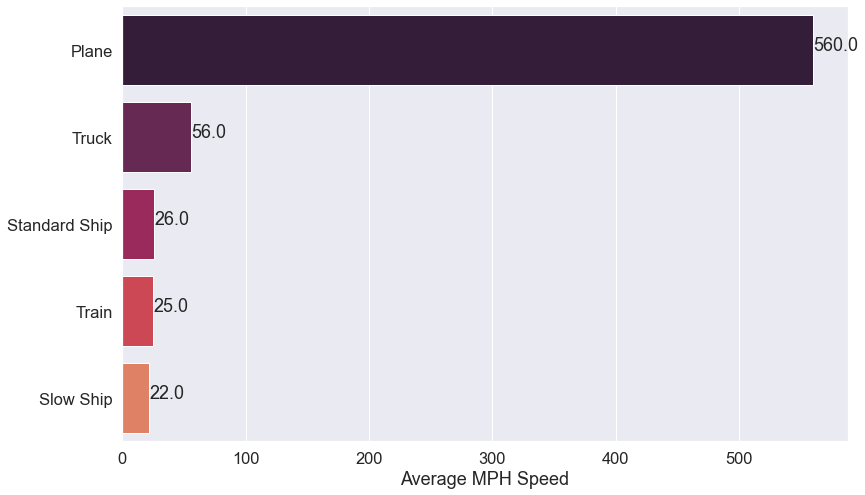

In [64]:
sns.set_palette("rocket")
a = sns.barplot(data=speeds, x = 'avg_mph_speed', y='type', orient = 'h')
a.set(xlabel = 'Average MPH Speed', ylabel='')
#a.set_title('Average MPH of Commercial Transit Type')

show_values(a, "h", space=0)

Putting it together (1000 miles)

In [32]:
speeds

,type,avg_mph_speed
2,Plane,560.0
0,Truck,56.0
1,Standard Ship,26.0
0,Train,25.0
0,Slow Ship,22.0


In [33]:
#I want to know how long it would take to transport goods across 1000 miles via different transport methods
#1000 divided by the mph - gives me the number of hours to travel 1000 miles

speeds['1000mi'] = 1000/speeds['avg_mph_speed']
speeds

,type,avg_mph_speed,1000mi
2,Plane,560.0,1.785714
0,Truck,56.0,17.857143
1,Standard Ship,26.0,38.461538
0,Train,25.0,40.000000
0,Slow Ship,22.0,45.454545


In [34]:
#rounding numbers for visualization clarity

speeds['1000mi'] = speeds['1000mi'].round(2)
speeds

,type,avg_mph_speed,1000mi
2,Plane,560.0,1.79
0,Truck,56.0,17.86
1,Standard Ship,26.0,38.46
0,Train,25.0,40.00
0,Slow Ship,22.0,45.45


I'm seeing a flaw with the logic here.  Trucks, ships, and trains all travel distance on the ground.  

Planes do not.  The distance in the sky is greater.   so 1000 ground miles of transit for a plane is not 1000 miles in the sky where they're flying 560mph.   And 1000 miles in the sky is less distance than on the ground, distorting the amount of time it takes to traverse that 1000 miles, since they're traveling less than that. Ultimately, planes are still the fastest, but for the sake of consistency and accuracy, I'd like to fix that number. 

In [35]:
plane = speeds.loc[speeds['type']=='Plane']
plane

,type,avg_mph_speed,1000mi
2,Plane,560.0,1.79


In [36]:
plane['land1000mi'] = 1000

<ipython-input-36-ef6661ea2d47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['land1000mi'] = 1000


In [37]:
#source for conversion rate info:https://traveltips.usatoday.com/compare-air-miles-land-miles-21236.html

plane['sky1000'] = plane['land1000mi'] * 1.15

<ipython-input-37-48239b0a7b4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['sky1000'] = plane['land1000mi'] * 1.15


In [38]:
plane

,type,avg_mph_speed,1000mi,land1000mi,sky1000
2,Plane,560.0,1.79,1000,1150.0


In [41]:
plane['1000mi']=plane['sky1000'] / plane['avg_mph_speed']
plane

<ipython-input-41-bbf359099330>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['1000mi']=plane['sky1000'] / plane['avg_mph_speed']


,type,avg_mph_speed,1000mi,land1000mi,sky1000
2,Plane,560.0,2.053571,1000,1150.0


In [44]:
speeds['1000mi']=speeds['1000mi'].replace(1.79, 2.05)
speeds

,type,avg_mph_speed,1000mi
2,Plane,560.0,2.05
0,Truck,56.0,17.86
1,Standard Ship,26.0,38.46
0,Train,25.0,40.00
0,Slow Ship,22.0,45.45


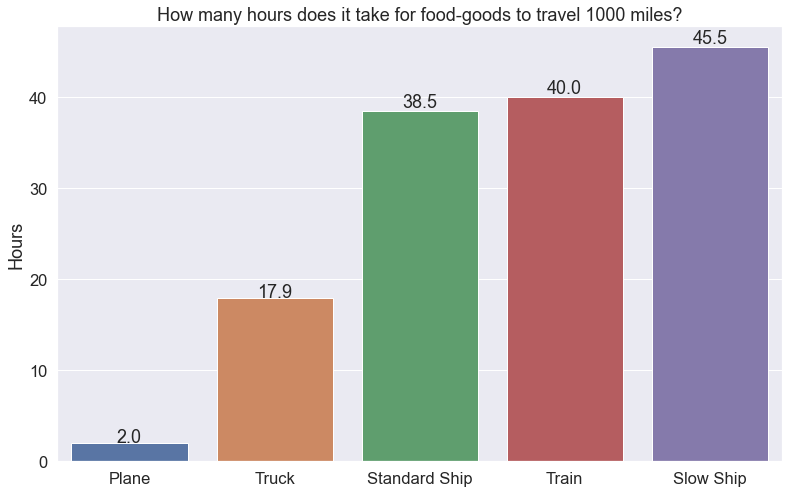

In [45]:
x = sns.barplot(data=speeds, x = 'type', y='1000mi')
x.set(xlabel = '', ylabel='Hours')
x.set_title('How many hours does it take for food-goods to travel 1000 miles?')

show_values(x)